# Portfolio Methodolgy

1. DGI/Growth Names - Rebalance every 6 months picking around 2 - 3 names from CA and US universe
    - Sell Covered Calls on names and re-enter if called away.
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: LOPE STOR PNW SBUX
    - LOPE Earnings: Nov 8
    - PNW Earnings: Nov 8
    - SBUX Earnings: Jan 23
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|11/06/2018|11/09/2018|11/19/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [281]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query
from alphaquery import alphaquery

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from lookup_earnings import lookup_earnings

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Processing')
from hv_calc import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [250]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

,Allocation,price,Market Value,Holdings
symbol,,,,
DBC,0.014,16.705,2800.0,168.0
HYG,0.014,84.540,2800.0,33.0
IEF,0.417,99.930,83400.0,835.0
IWM,0.014,154.610,2800.0,18.0
LQD,0.500,112.145,100000.0,892.0
QQQ,0.014,170.710,2800.0,16.0
SPY,0.014,275.550,2800.0,10.0
VNQ,0.014,79.585,2800.0,35.0


## Checking market correlations

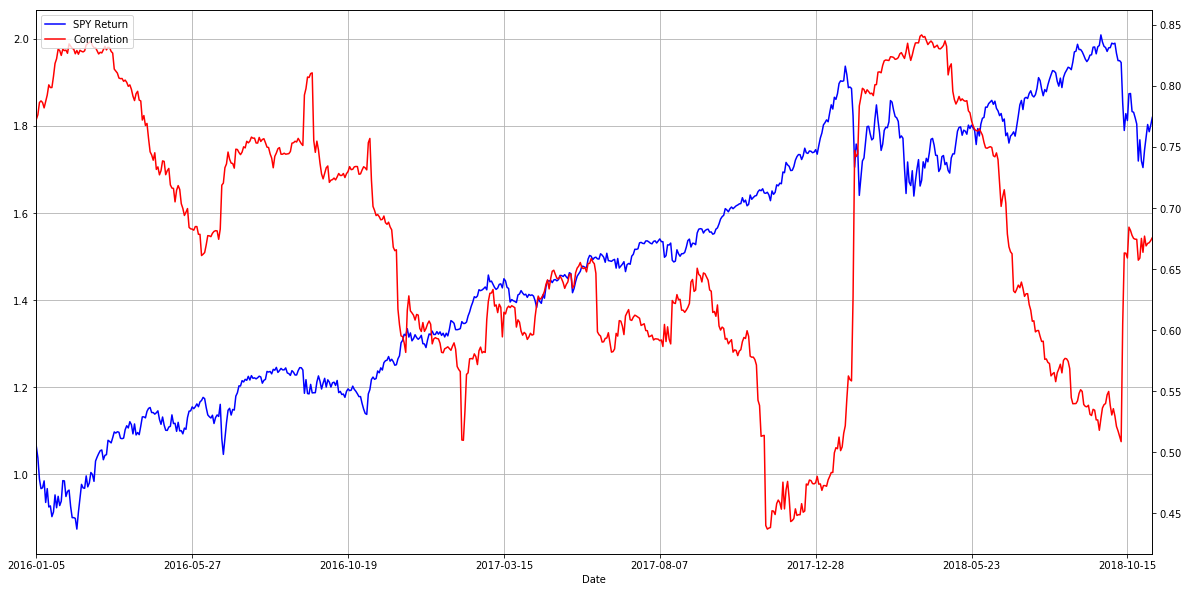

                XLRE       XLV       XLI       XLK       XLP       XLU  \
2018-10-31  0.395356  0.908453  0.852474  0.916932  0.415250 -0.006917   
2018-11-01  0.399878  0.910993  0.856426  0.917836  0.427726 -0.016608   
2018-11-02  0.404528  0.911463  0.855520  0.914758  0.431493 -0.010320   
2018-11-05  0.406407  0.911579  0.855287  0.911142  0.435100  0.000804   
2018-11-06  0.410559  0.912896  0.856025  0.912025  0.438923  0.009735   

                 XLB       XLF       XLE       XLY  Avg_Corr   SPY_cum  
2018-10-31  0.759625  0.813259  0.729650  0.906124  0.669021  1.773914  
2018-11-01  0.759765  0.812704  0.734797  0.907035  0.671055  1.803434  
2018-11-02  0.761571  0.811104  0.735113  0.901108  0.671634  1.786829  
2018-11-05  0.760761  0.807639  0.746910  0.898857  0.673448  1.802204  
2018-11-06  0.761025  0.809330  0.748661  0.898487  0.675767  1.819833  


In [251]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [252]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLK,XLP,XLU,XLB,XLF,XLE,XLY,XLC
2018-10-31,-0.017677,0.018730,0.045251,-0.045746,-0.029819,0.077360,0.069735,-0.100530,-0.039122,-0.101418,-0.057255,-0.078463
2018-11-01,-0.007223,0.022540,0.058449,-0.028950,-0.018480,0.084998,0.064953,-0.075227,-0.034735,-0.093792,-0.038021,-0.073058
2018-11-02,-0.013103,0.013968,0.051850,-0.030589,-0.037659,0.079318,0.058976,-0.077449,-0.035466,-0.096066,-0.034085,-0.082466
2018-11-05,-0.007659,0.030794,0.061160,-0.025536,-0.038639,0.092832,0.073919,-0.074714,-0.020110,-0.080947,-0.032743,-0.086269
2018-11-06,-0.001416,0.036508,0.066580,-0.015294,-0.032619,0.099295,0.081490,-0.059497,-0.014991,-0.076666,-0.028449,-0.080865


## Earnings

**Key modules to run**
- new_earnings_setup.py for given date in string form 'yyyy-mm-dd': this gives the latest input data for earnings_prediction
- earnings_prediction.py for determining position to take on earnings name

In [350]:
date_lookup = '2018-11-08'

curr_earnings = date_earnings(date_lookup)
curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]

In [354]:
acs = curr_earnings[curr_earnings['Call Time'] == 'After Market Close']
bcs = curr_earnings[curr_earnings['Call Time'] == 'Before Market Open']
focus_names = acs.index.drop_duplicates().tolist()
acs

,Call Time,EPS Estimate,Name
UEPS,After Market Close,0.14,Net 1 UEPS Technologies Inc
JOBS,After Market Close,0.61,51job Inc
ARA,After Market Close,0.15,American Renal Associates Holdings Inc
AMC,After Market Close,-0.47,AMC Entertainment Holdings Inc
AGO,After Market Close,0.72,Assured Guaranty Ltd
AL,After Market Close,1.22,Air Lease Corp
ATVI,After Market Close,0.5,Activision Blizzard Inc
AUTO,After Market Close,-0.13,AutoWeb Inc
AREX,After Market Close,-0.08,Approach Resources Inc
DOX,After Market Close,0.99,Amdocs Ltd


In [428]:
start_time = time.time()

start_date = dt.datetime(2018,1,1)

earnings_data = lookup_earnings(focus_names, start_date)

print("--- %s seconds ---" % (time.time() - start_time))

In [376]:
#################### Preliminary Name Selection ###################################
summary_df = earnings_data[1]
summary_df = summary_df[summary_df['Market Cap(Mil.)'] > 500].sort_values('Market Cap(Mil.)')

eps_df = earnings_data[0]
eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_df['NegativeSurprise'] = eps_df['surprisePercent'] < 0 
eps_df['PositiveSurprise'] = eps_df['surprisePercent'] > 0
eps_df['returnDifferentFromEPS'] = eps_df['surprisePercent']*eps_df['Stock_closeToOpen'] < 0
eps_df['LargeMoves'] = abs(eps_df['Stock_closeToOpen']) > 0.02

eps_corr = eps_df[['Underlying','NegativeSurprise',
                   'PositiveSurprise',
                   'returnDifferentFromEPS']].groupby('Underlying').sum()
eps_corr['surpriseReturnCorrelation'] = np.nan
corrs = []
for ticker in eps_corr.index:
    curr_corr = eps_df[eps_df['Underlying'] == ticker]
    corrs.append(curr_corr[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1])
eps_corr['surpriseReturnCorrelation'] = corrs
eps_corr['LargeMoves'] = eps_df[['Underlying','LargeMoves']].groupby('Underlying').sum()

selected_names = eps_corr[eps_corr['LargeMoves'] > 2].index.tolist()

#################### Filtering on Preliminary Name Selection ###################################
summary_df = summary_df[summary_df.index.isin(selected_names)]

eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_corr = eps_corr[eps_corr.index.isin(summary_df.index)]

scores_df = earnings_data[2]
scores_df = scores_df[scores_df.index.isin(summary_df.index)]
scores_df['TotalScore'] = scores_df.mean(axis = 1)
scores_df = scores_df.sort_values('TotalScore')

analyst_df = earnings_data[3]
analyst_df = analyst_df[analyst_df.index.isin(summary_df.index)]

valuations_df = earnings_data[4]
valuations_df = valuations_df[valuations_df.Underlying.isin(summary_df.index)]

growthrate_df = earnings_data[5]
growthrate_df = growthrate_df[growthrate_df.Underlying.isin(summary_df.index)]

profitability_df = earnings_data[6]
profitability_df = profitability_df[profitability_df.Underlying.isin(summary_df.index)]

finstrength_df = earnings_data[7]
finstrength_df = finstrength_df[finstrength_df.Underlying.isin(summary_df.index)]

perf_df = earnings_data[8]
perf_df = perf_df[perf_df.Underlying.isin(summary_df.index)]

rev_revisions_df = earnings_data[9]
rev_revisions_df = rev_revisions_df[rev_revisions_df.Underlying.isin(summary_df.index)]

earnings_revisions_df = earnings_data[10]
earnings_revisions_df = earnings_revisions_df[earnings_revisions_df.Underlying.isin(summary_df.index)]

insider_trades = earnings_data[11]
insider_trades = insider_trades[insider_trades.Underlying.isin(summary_df.index)]
insider_trades['Trading Date'] = pd.to_datetime(insider_trades['Trading Date'])
def aggregate_txns_date(trade_date):
    
    trade_month = trade_date.month
    trade_year = trade_date.year
    if trade_month <= 3:
        return dt.datetime(trade_year,3,31).date()
    elif trade_month <= 6:
        return dt.datetime(trade_year,6,30).date()
    elif trade_month <= 9:
        return dt.datetime(trade_year,9,30).date()
    else:
        return dt.datetime(trade_year,12,31).date()
    
insider_trades['Trading Date'] = insider_trades['Trading Date'].apply(aggregate_txns_date)

growth_sums = earnings_data[12]
growth_sums = growth_sums[growth_sums.Underlying.isin(summary_df.index)]


In [378]:
selected_names = scores_df.sort_values(['ValuationScore','TotalScore']).index.tolist()

options_dict = {}

for name in selected_names:
    
    try:
        curr_options = all_options(name,100,1,moneyness=0.1)
        if len(curr_options) > 0 and (curr_options['Ask'] - curr_options['Bid']).mean() < 1:
            options_dict[name] = curr_options
    except:
        None

In [431]:
selected_names = shorts + longs#list(options_dict.keys()) #

for selected_name in selected_names:
    print(selected_name)
    for i, df in enumerate(earnings_data):
        if i == 2 or i == 3 or i == 1:
            None #print(df[df.index == selected_name])
        elif i == 11:
            #print(df[df.Underlying == selected_name][df.columns.tolist()[1:-1]])
            print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                      'Type']).agg({'Underlying':'count',
                                                                                                    'Shares Traded': 'sum'}))
        else:
            print(df[df.Underlying == selected_name])
        print('\n')

OSTK
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0     -0.03          0.06       -0.09            0.667       OSTK 2017-09-30   
1     -0.47         -0.42       -0.05           -8.400       OSTK 2017-12-31   
2     -1.78         -0.87       -0.91           -0.956       OSTK 2018-03-31   
3     -2.25         -1.43       -0.82           -1.744       OSTK 2018-06-30   

   Stock_closeToOpen EarningsDate  
0           0.147132   2017-11-08  
1          -0.153527   2018-03-15  
2          -0.022281   2018-05-08  
3           0.216321   2018-08-09  








   Company                         Field  industry  sector Underlying
0      NaN               P/E Ratio (TTM)     27.05   10.67       OSTK
1   124.02        P/E High - Last 5 Yrs.     58.98   22.68       OSTK
2     8.87         P/E Low - Last 5 Yrs.     27.01    9.97       OSTK
3     1.79                          Beta      1.05    1.10       OSTK
4     0.31          Price to Sales (TTM)      6.25  257.

In [380]:
vols_list = []

for selected_name in selected_names:
    curr_vol = historical_data(selected_name, dt.datetime(2018,1,1))[['daily_ann','intra_ann','ovrnt_ann']].tail(1)
    curr_vol.index = [selected_name]
    
    aq = alphaquery(selected_name)
    
    curr_iv = aq.vol_df.loc[['Implied Volatility (Calls)', 'Implied Volatility (Puts)', 
                             'Put-Call Implied Volatility Ratio',
                             'Implied Volatility Skew'],['20-Day']].T
    curr_iv.index = [selected_name]
    vols_list.append(curr_vol.join(curr_iv))
    
hv_df = pd.concat(vols_list,axis = 0)

In [404]:
insider_agg_lst = []

for selected_name in selected_names:
    curr_insider_agg = insider_trades[insider_trades.Underlying == selected_name].groupby(['Type']).agg({'Shares Traded': 'sum'}).T
    curr_insider_agg.index = [selected_name]
    insider_agg_lst.append(curr_insider_agg)
    
insider_agg = pd.concat(insider_agg_lst,axis = 0)
insider_agg['BuyToSell'] = insider_agg['Buy']/insider_agg['Sell']


hv_df[(hv_df['intra_ann'] > hv_df['Implied Volatility (Calls)']) &
      (hv_df['intra_ann'] > hv_df['Implied Volatility (Puts)'])].dropna().sort_values('intra_ann').join(insider_agg,
                                                                                                        how = 'inner')

,daily_ann,intra_ann,ovrnt_ann,Implied Volatility (Calls),Implied Volatility (Puts),Put-Call Implied Volatility Ratio,Implied Volatility Skew,Buy,Gift,Sell,BuyToSell
PRAA,0.409169,0.770406,0.129493,0.6340,0.6331,0.9986,0.0984,198152.0,NaN,2520048.0,0.078630
SYNA,0.429027,0.782602,0.212256,0.6561,0.6303,0.9607,0.0794,1345992.0,NaN,2728134.0,0.493375
CBPX,0.420670,0.802272,0.152601,0.5285,0.5506,1.0418,0.0355,291126.0,NaN,50517.0,5.762931
AMC,0.578697,0.955894,0.175762,0.6279,0.6056,0.9645,0.0242,661628.0,NaN,267284.0,2.475375
TRUP,0.708554,1.341991,0.134048,0.9443,1.0345,1.0955,0.1022,94504.0,NaN,2196616.0,0.043023
HTZ,0.835090,1.575489,0.274215,1.0832,1.0674,0.9854,0.0760,503695.0,NaN,23154.0,21.754125
XON,0.820839,1.584590,0.236032,0.9564,0.9603,1.0041,0.0121,32136602.0,NaN,349608.0,91.921815
OSTK,0.851896,1.647085,0.283537,1.0540,1.0519,0.9980,-0.0029,592560.0,10664.0,6323776.0,0.093704


In [412]:
shorts = ['OSTK', 'TRUP', 'PRAA']

longs = ['XON', 'HTZ']

print(scores_df[scores_df.index.isin(shorts + longs)])
print(eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying'))
print(analyst_df[analyst_df.index.isin(shorts + longs)].sort_values('Current'))
summary_df[summary_df.index.isin(shorts + longs)].T

      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
OSTK              40.0            21.43          40.20          0.0   
HTZ                0.0            35.71          60.10         35.0   
XON               40.0            28.57          66.16         55.0   
PRAA               0.0            14.29          50.71         90.0   
TRUP              80.0            71.43          60.71         20.0   

      ReturnScore  ValuationScore  TotalScore  
OSTK          0.0           37.50   23.188333  
HTZ          10.0           62.50   33.885000  
XON          20.0           37.50   41.205000  
PRAA         20.0           87.50   43.750000  
TRUP        100.0            6.25   56.398333  
           EarningsDate  surprisePercent    Quarter  Stock_closeToOpen
Underlying                                                            
XON          2017-11-09           -0.435 2017-09-30          -0.052897
XON          2018-03-01            0.281 2017-12-31           0.029457
X

,OSTK,TRUP,PRAA,XON,HTZ
Beta,1.26,NaN,1.64,1.55,2.19
Dividend,NaN,NaN,NaN,NaN,NaN
EPS (TTM) Industry,NaN,NaN,NaN,NaN,NaN
EPS (TTM) Sector,NaN,NaN,NaN,NaN,NaN
EPS (TTM) Stock,-0.52,-0.15,1.53,-0.69,-9.48
High52Week,88.45,46.25,43.75,20.16,25.14
LastPrice,20.13,26.31,31.60,12.77,16.53
Low52Week,19.08,24.83,27.25,10.26,13.01
Market Cap(Mil.),750.01,811.38,1441.90,1748.02,2117.20
P/E (TTM) Industry,34.43,14.25,29.62,97.91,27.81


In [426]:
selected_name = 'HTZ'

aq = alphaquery(selected_name)
print(aq.vol_df)

insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                    'Type']).agg({'Underlying':'count',
                                                                                  'Shares Traded': 'sum'})



                                         10-Day   20-Day   30-Day   60-Day  \
Field                                                                        
Historical Volatility (Close-to-Close)   0.3942   0.9544   0.8206   0.6453   
Historical Volatility (Parkinson)        0.6053   0.7268   0.6510   0.5886   
Implied Volatility (Calls)               1.2016   1.0832   0.9648   0.7566   
Implied Volatility (Puts)                1.1801   1.0674   0.9548   0.7503   
Implied Volatility (Mean)                1.1908   1.0753   0.9598   0.7534   
Put-Call Implied Volatility Ratio        0.9821   0.9854   0.9896   0.9917   
Implied Volatility Skew                  0.0897   0.0760   0.0623   0.0424   
Put-Call Ratio (Volume)                  0.9287   3.3885   5.8483  11.4743   
Put-Call Ratio (Open Interest)           0.8148   0.7271   0.6395   1.5824   
Forward Price                           15.8500  15.8800  15.9100  15.9500   
Call Breakeven Price                    17.8000  17.8900  17.970

Underlying  Shares Traded
Trading Date Title                    Type                           
2018-03-31   Chief Technology Officer Buy            1         4806.0
             General Counsel          Buy            2         3604.0
             Officer                  Sell           3        16350.0
2018-06-30   Chief Financial Officer  Buy            6        54381.0
                                      Sell           3         2286.0
             Director                 Buy           21       141879.0
             General Counsel          Buy            3          897.0
                                      Sell           3          219.0
             Officer                  Buy            9        25317.0
                                      Sell           6         2838.0
2018-09-30   Chief Financial Officer  Buy            3       207225.0
             Chief Technology Officer Buy            3        45927.0
             Director                 Buy            9        19659.0
2018-12-31   Officer                  Sell           3         1461.0

In [427]:
insider_trades[insider_trades.Underlying == selected_name].sort_values('Trading Date').to_csv('HTZ.csv')

In [374]:
# Saving Selected Names for Reference

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')

datenow = dt.datetime.today().strftime('%Y-%m-%d')

scores_df.sort_values(['ValuationScore','TotalScore']).join(summary_df).to_csv('earnings-{}.csv'.format(datenow))

os.chdir(main_dir)

## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]